In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
def get_data(fname):
    vals = []
    with open(fname, 'r') as fin:
        for line in fin:
            pairs = line.rstrip('\n').split(',')
            vals.append(float(pairs[1]))
    
    return vals

def plot_data(fname, label=''):
    vals = get_data(fname)
    sns.distplot(vals, norm_hist=True, hist=True, kde=False, hist_kws={"label":label, "histtype": "step", "linewidth": 2, "alpha": 1})

## logS0 distributions for training and test sets

There are two major obstacles that we need to overcome when predicting intrinsic solublity from the challange:      
1. The amount of available data is scarce (3100-3200 unique compounds) whereas the chemical space is vast.
2. The majority of the data points in the training set is about logS0 ~= -2.0, whereas the average estimated GSE value for the Set-100 (Set-32) is about -4.0 (-6.0). Moreover, we have a small amount of data and the target values are much different than the majority of the training data (we assume that GSE provides reasonable estimates; this assumption is justified as the RMSE value is provided by the authors of the challenge)

Thus, we can't expect the model to generalize well :-(   

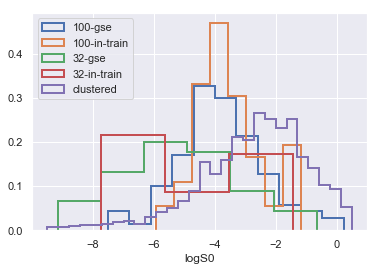

In [3]:
filename = '/Users/pawel/Projects/solubility/data/training/solubility.uniq.no-in-100.smi'
f_100_gse = '/Users/pawel/Projects/solubility/data/test/test_100.with.gse.smi'
f_100 = '/Users/pawel/Projects/solubility/data/test/test_100.in-train.smi'
f_32_gse = '/Users/pawel/Projects/solubility/data/test/test_32.with.gse.smi'
f_32 = '/Users/pawel/Projects/solubility/data/test/test_32.in-train.smi'
clustered = '/Users/pawel/Projects/solubility/data/training/solubility.clustered.no-in-100.smi'

#plot_data(filename, 'train')
plot_data(f_100_gse, '100-gse')
plot_data(f_100, '100-in-train')
plot_data(f_32_gse, '32-gse')
plot_data(f_32, '32-in-train')
plot_data(clustered, 'clustered')
plt.xlabel("logS0")
plt.legend()